In [1]:
import qiskit
print(qiskit.version.get_version_info())
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit import Parameter

1.1.1


In [ ]:
# Step 1 -- Distributable Quantum Circuit
# Input: N/D.
# Output: `circuit`.

def constructQVC(n, k):    
    # Create a quantum circuit with 3 qubits
    num_qubits = n
    depth = k
    qc = QuantumCircuit(num_qubits)

    for i in range(k):
        # Add parameterized rotation gates
        for qubit in range(num_qubits):
            qc.ry(0, qubit)
        
        # Add a layer of CNOT gates (entangling layer)
        for qubit in range(num_qubits - 1):
            qc.cx(qubit, qubit + 1)

    return qc

circuit = constructQVC(12, 2)
circuit.measure_all()
print(circuit)

In [2]:
import math

n = 10 #128 is maximum computer can run

# Initialize the Quantum Circuit
data_1 = QuantumRegister(n, "data")
#data_2 = QuantumRegister(1, "data_2")  # spare qubits
cr = ClassicalRegister(n, "classical")
circuit = QuantumCircuit(data_1, cr)

# Grover operator G_i
def Grover(qc, data, iteration):

  # Superposition
  qc.h(data[iteration:iteration+2])
  #qc.barrier()

  # Mark the specific state |w_i>
  qc.cz(data[iteration+1], data[iteration])
  #qc.barrier()

  # Diffusion
  qc.rz(math.pi, data[iteration])
  qc.ry(math.pi/2, data[iteration+1])
  qc.cx(data[iteration+1], data[iteration]) # Use standard mcx
  qc.ry(-math.pi/2, data[iteration+1])
  qc.rz(-math.pi, data[iteration])
  #qc.barrier()

  qc.h(data[iteration:iteration+2])
  #qc.barrier()

  # Measurement
  qc.measure(data[iteration:iteration+2], cr[iteration:iteration+2])
  

# modified Grover operator L_i
def modified_Grover(qc, data, phase):

  # Superposition
  qc.h(data[0:3])
  #qc.barrier()

  # Mark the specific state |w_i>
  qc.mcrz(math.pi, data[1:3], data[0]) # Use mcrz instead of mcx_vchain
  #qc.barrier()

  # Diffusion
  qc.rz(phase, data[0])
  qc.ry(phase/2, data[1:3])
  qc.mcx(data[1:3], data[0]) # Use standard mcx
  qc.ry(-phase/2, data[1:3])
  qc.rz(-phase, data[0])
  #qc.barrier()

  qc.h(data[0:3])
  #qc.barrier()

  # Measurement
  qc.measure(data[0:3], cr[0:3])

###############################################################################


# Distributed exact Grover's algorithm (DEGA)

def DEGA(n, qc, data, phase):

  # Superposition
  qc.barrier()

  # Determine the parity of n
  if n % 2 == 1:
    modified_Grover(qc, data, math.pi/3)
    n_even = n - 3
    for iteration in range(n_even//2):
      iter = iteration * 2 + 3
      Grover(qc, data, iter)
  else:
    n_even = n
    for iteration in range(n_even//2):
      iter = iteration * 2
      Grover(qc, data, iter)

DEGA(n, circuit, data_1, math.pi)
print(circuit)

               ░ ┌───┐    ┌───────┐ ┌───┐ ┌────────┐ ┌───┐┌─┐                  »
      data_0: ─░─┤ H ├─■──┤ Rz(π) ├─┤ X ├─┤ Rz(-π) ├─┤ H ├┤M├──────────────────»
               ░ ├───┤ │ ┌┴───────┴┐└─┬─┘┌┴────────┴┐├───┤└╥┘┌─┐               »
      data_1: ─░─┤ H ├─■─┤ Ry(π/2) ├──■──┤ Ry(-π/2) ├┤ H ├─╫─┤M├───────────────»
               ░ ├───┤   └┬───────┬┘┌───┐└┬────────┬┘├───┤ ║ └╥┘┌─┐            »
      data_2: ─░─┤ H ├─■──┤ Rz(π) ├─┤ X ├─┤ Rz(-π) ├─┤ H ├─╫──╫─┤M├────────────»
               ░ ├───┤ │ ┌┴───────┴┐└─┬─┘┌┴────────┴┐├───┤ ║  ║ └╥┘┌─┐         »
      data_3: ─░─┤ H ├─■─┤ Ry(π/2) ├──■──┤ Ry(-π/2) ├┤ H ├─╫──╫──╫─┤M├─────────»
               ░ ├───┤   └┬───────┬┘┌───┐└┬────────┬┘├───┤ ║  ║  ║ └╥┘┌─┐      »
      data_4: ─░─┤ H ├─■──┤ Rz(π) ├─┤ X ├─┤ Rz(-π) ├─┤ H ├─╫──╫──╫──╫─┤M├──────»
               ░ ├───┤ │ ┌┴───────┴┐└─┬─┘┌┴────────┴┐├───┤ ║  ║  ║  ║ └╥┘┌─┐   »
      data_5: ─░─┤ H ├─■─┤ Ry(π/2) ├──■──┤ Ry(-π/2) ├┤ H ├─╫──╫──╫──╫──╫─┤M├───»
               ░ ├───┤   └┬─

In [ ]:
qubits = QuantumRegister(4)
clbits = ClassicalRegister(4)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2, q3) = qubits
(c0, c1, c2, c3) = clbits

circuit.h(q1)
circuit.cx(q1, q2)
circuit.cx(q3, q2)
circuit.measure(q2, c2)

with circuit.if_test((0, 1)):
    circuit.x(q1)
    circuit.x(q2)

circuit.cu(0, 0, 0, 0, [1], [0])
circuit.h(q1)
circuit.measure(q1, c1)

with circuit.if_test((0, 1)):
    circuit.z(q1)
    circuit.x(q3)

circuit.measure(q0, c0)

print(circuit)

#backend = AerSimulator()
#result=backend.run(qc).result()
#counts = result.get_counts()
#print(counts)

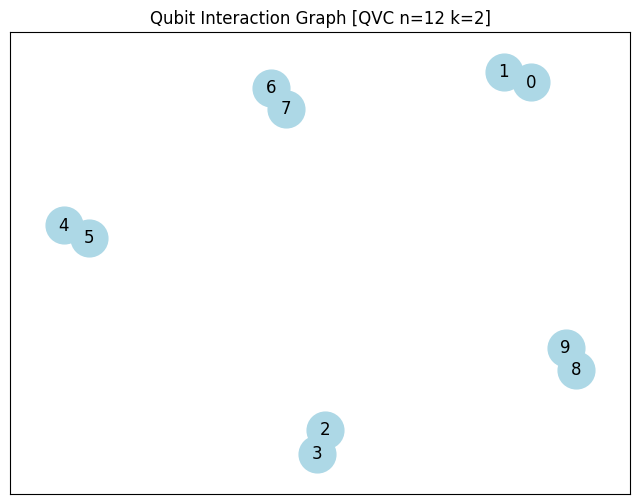

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def create_qubit_interaction_graph(circuit):
    """Creates a graph based on the quantum circuit where nodes are qubits and edges
    are weighted by the number of 2-qubit gates between them."""
    
    # Initialize a graph
    G = nx.Graph()
    
    # Add nodes for each qubit
    for qubit in range(circuit.num_qubits):
        G.add_node(qubit)
    
    # Iterate through the circuit to find 2-qubit gates and update edge weights
    for gate in circuit.data:
        if len(gate[1]) == 2:  # If the gate acts on two qubits
            qubit1 = circuit.find_bit(gate[1][0])[0]
            qubit2 = circuit.find_bit(gate[1][1])[0]            
            if G.has_edge(qubit1, qubit2):
                G[qubit1][qubit2]['weight'] += 1
            else:
                G.add_edge(qubit1, qubit2, weight=1)

    return G

def get_color(index):
    if index == 0:
        return 'lightblue'
    elif index == 1:
        return 'lightpink'
    elif index == 2:
        return 'lightgreen'
    elif index == 3:
        return 'lightgray'
    else:
        return get_color(index % 4)

def plot_qubit_interaction_graph(G, title, clusters = None):
    """Plots the qubit interaction graph."""
    pos = nx.spring_layout(G)  # Layout for a visually appealing graph
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    
    # Draw nodes
    if clusters is None:
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
    else:
        color = 0
        for cluster in clusters:
            nx.draw_networkx_nodes(G, pos, nodelist=cluster, node_color=get_color(color), node_size=700)
            color = color + 1
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
    
    # Draw edges with weights
    edges = G.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]
    
    if edges:  # Ensure there are edges to draw
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)
        edge_labels = {(u, v): d['weight'] for u, v, d in edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title(title)
    plt.show()

# Create the qubit interaction graph
G = create_qubit_interaction_graph(circuit)

# Plot the graph
plot_qubit_interaction_graph(G, "Qubit Interaction Graph [QVC n=12 k=2]")

[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]


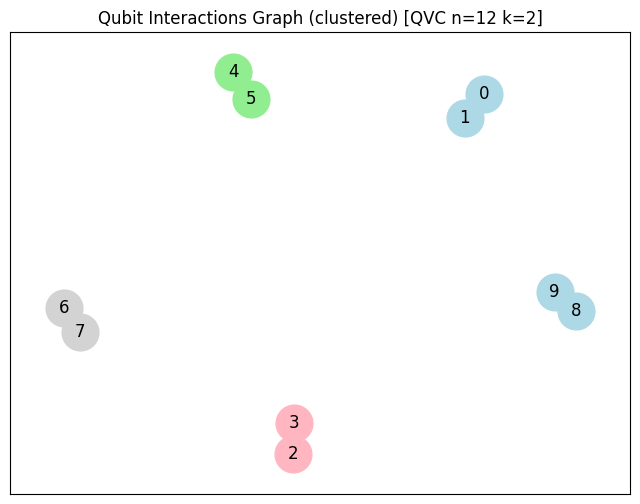

In [4]:
# Step 2 -- Break down algorithm
# Input: `circuit`.
# Output: `distribution_map`.

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity
from itertools import combinations
import random

def calculate_edge_cut(G, nodes1, nodes2):
    cut_value = 0
    for u in nodes1:
        for v in nodes2:
            if G.has_edge(u, v):
                cut_value += G[u][v].get('weight')
    return cut_value

def divide_graph(G, n):
    communities = list(greedy_modularity_communities(G, weight='weight', cutoff=n, best_n=n))
    return [list(f) for f in communities]

clusters = divide_graph(G, 5)
print(clusters)

plot_qubit_interaction_graph(G, "Qubit Interactions Graph (clustered) [QVC n=12 k=2]", clusters)

Coupling map: EdgeList[(0, 1), (1, 0), (2, 3), (3, 2), (4, 5), (5, 4), (6, 7), (7, 6), (8, 9), (9, 8), (0, 2), (2, 0), (0, 4), (4, 0), (0, 6), (6, 0), (0, 8), (8, 0), (2, 4), (4, 2), (2, 6), (6, 2), (2, 8), (8, 2), (4, 6), (6, 4), (4, 8), (8, 4), (6, 8), (8, 6)]


/Users/artemkandaurov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


{'1001100100': 1, '1101011101': 1, '0010010001': 1, '1100000111': 1, '0110010110': 1, '1111011001': 1, '0111011100': 1, '0010001110': 1, '0001011101': 1, '0111011110': 1, '1011000101': 1, '0001000000': 1, '0011101101': 1, '1010011010': 1, '1001001111': 1, '1100111010': 1, '0100110001': 1, '0101101000': 1, '0010111000': 1, '0000111101': 2, '0010110110': 1, '0110010000': 1, '0100010101': 1, '1111000011': 1, '0011111001': 1, '0110011000': 1, '1110101010': 1, '0000101001': 1, '1001001010': 1, '1001110100': 1, '1000110010': 1, '0111010011': 1, '0010010111': 1, '1010001000': 1, '0010011111': 1, '0101110110': 2, '0101010100': 2, '0001111010': 2, '1001000000': 3, '1100100000': 1, '0101101101': 1, '0101000110': 1, '1001011000': 3, '0100101110': 1, '1101101010': 1, '1011111101': 1, '0001000110': 2, '1010001110': 1, '1010110000': 2, '0101001001': 1, '1100011001': 2, '0110011100': 2, '1011000000': 1, '1100101111': 1, '0000001111': 1, '1001111110': 1, '1101000010': 1, '1011101110': 1, '0001100000':

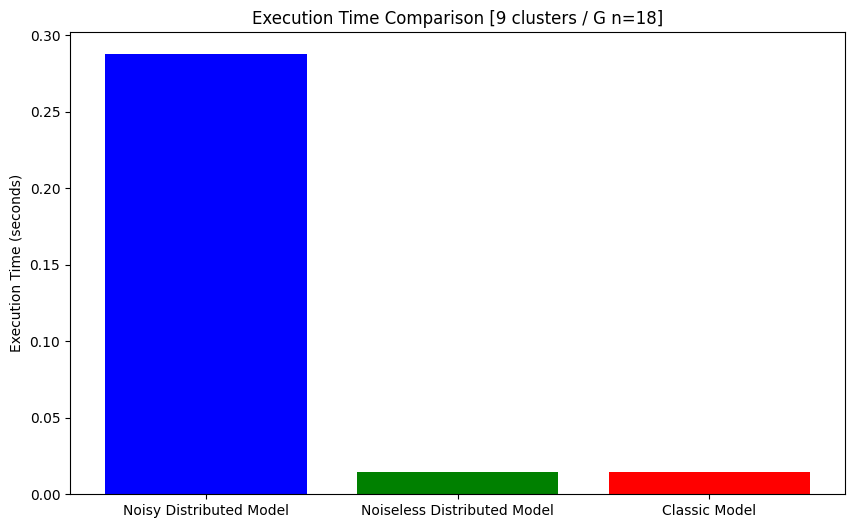

In [5]:
# Step 3 -- Run with distributed system simulator
# Input: `circuit`, `clusters`.
# Output: N/D.

from itertools import product   
from itertools import permutations        
from itertools import combinations
from qiskit import transpile
from qiskit.compiler.transpiler import CouplingMap
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
import time
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.compiler.transpiler import CouplingMap, transpile
from qiskit_aer import AerSimulator

cm = CouplingMap()
for i in range(circuit.num_qubits):
    cm.add_physical_qubit(i)

for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        for k in range(len(clusters[i])):
            if(j!=k):
                cm.add_edge(clusters[i][j],clusters[i][k])

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        cm.add_edge(clusters[i][0],clusters[j][0])
        cm.add_edge(clusters[j][0],clusters[i][0])

print("Coupling map:", cm.get_edges())

# Create the noise model
noise_model = NoiseModel()

# Define depolarizing noise to be applied to specific nodes
depolarizing_1noise = depolarizing_error(0.05, 1)  # 5% depolarizing noise
depolarizing_2noise = depolarizing_error(0.05, 2)  # 5% depolarizing noise

# Apply noise to specific qubits/nodes
for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        # Apply single-qubit noise to each qubit individually
        noise_model.add_quantum_error(depolarizing_1noise, ['id', 'rz', 'sx'], [clusters[i][0]])
        noise_model.add_quantum_error(depolarizing_1noise, ['id', 'rz', 'sx'], [clusters[j][0]])
        # Apply two-qubit noise to the pair of qubits for 'cx' gate
        noise_model.add_quantum_error(depolarizing_2noise, ['cx'], [clusters[i][0], clusters[j][0]])
# Set up the simulator backend with the noise model
distributed_noisy_simulator = AerSimulator(noise_model=noise_model)

transpiled_distributed_noisy_qc=transpile(circuit, backend=distributed_noisy_simulator,coupling_map=cm)

distributed_noisy_result=distributed_noisy_simulator.run(transpiled_distributed_noisy_qc).result()
print(distributed_noisy_result.get_counts())

# Set up the simulator backend with the noiseless model
distributed_noiseless_simulator = AerSimulator()

transpiled_distributed_noiseless_qc=transpile(circuit, backend=distributed_noiseless_simulator,coupling_map=cm)

distributed_noiseless_result=distributed_noiseless_simulator.run(transpiled_distributed_noiseless_qc).result()
print(distributed_noiseless_result.get_counts())

# Set up the simulator backend with the noiseless model
classic_simulator = AerSimulator()
classic_cm = CouplingMap.from_line(circuit.num_qubits)

transpiled_classic_qc=transpile(circuit, backend=classic_simulator,coupling_map=classic_cm)

classic_result=classic_simulator.run(transpiled_classic_qc).result()
print(classic_result.get_counts())



# Simulate with noisy model
start_time = time.time()
transpiled_distributed_noisy_qc = transpile(circuit, backend=distributed_noisy_simulator, coupling_map=cm)
distributed_noisy_result = distributed_noisy_simulator.run(transpiled_distributed_noisy_qc).result()
noisy_counts = distributed_noisy_result.get_counts()
noisy_time = time.time() - start_time
print("Noisy Execution Time:", noisy_time)
print(noisy_counts)

# Simulate with noiseless model
start_time = time.time()
transpiled_distributed_noiseless_qc = transpile(circuit, backend=distributed_noiseless_simulator, coupling_map=cm)
distributed_noiseless_result = distributed_noiseless_simulator.run(transpiled_distributed_noiseless_qc).result()
noiseless_counts = distributed_noiseless_result.get_counts()
noiseless_time = time.time() - start_time
print("Noiseless Execution Time:", noiseless_time)
print(noiseless_counts)

# Simulate with classic (noiseless, simple coupling)
start_time = time.time()
classic_cm = CouplingMap.from_line(circuit.num_qubits)
transpiled_classic_qc = transpile(circuit, backend=classic_simulator, coupling_map=classic_cm)
classic_result = classic_simulator.run(transpiled_classic_qc).result()
classic_counts = classic_result.get_counts()
classic_time = time.time() - start_time
print("Classic Execution Time:", classic_time)
print(classic_counts)

# Execution times
execution_times = {
    'Noisy Distributed Model': noisy_time,
    'Noiseless Distributed Model': noiseless_time,
    'Classic Model': classic_time
}

# Plot execution times
plt.figure(figsize=(10, 6))
print("WTF: exec times", execution_times)
plt.bar(execution_times.keys(), execution_times.values(), color=['blue', 'green', 'red'])
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison [9 clusters / G n=18]')
plt.show()

In [ ]:
# Plot execution times
plt.figure(figsize=(10, 6))
plt.bar(["1 cluster", "2 clusters", "3 clusters", "4 clusters"], [0.018588781356811523, 0.15360736846923828, 0.17413973808288574, 0.1940770149230957], color=['blue', 'blue', 'blue'])
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison (noisy distributed model) [QVC n=12 k=2]')
plt.show()

In [ ]:
print(cm)